Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1859
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0441 
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0327 
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169 
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0128 
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072 
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027 
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2511e-04 
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4084e-04 
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2936e-04 
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4716e-04 
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8814e-04 
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3937e-04 
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9804e-05 
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.5247e-05 
Epo

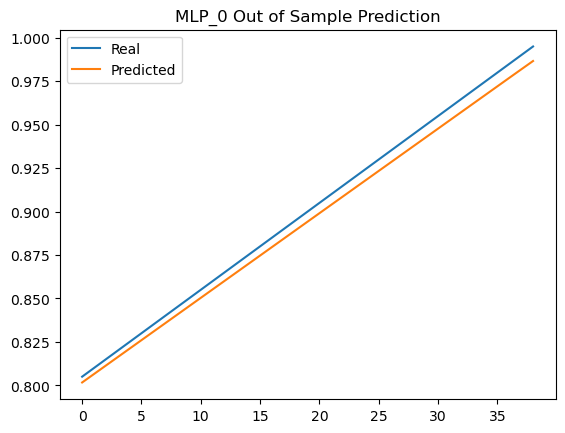

R2 =  0.9880319940395302
MAE =  0.005811871015108565
MSE =  3.594280311668666e-05
MAPE =  0.006422697585124349
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


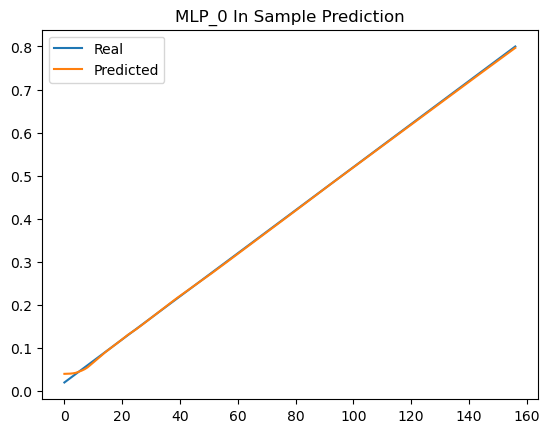

In [146]:
# Task 3.1.1.
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from tensorflow import keras
from keras.layers import Dense
from keras.layers import Input
from keras.models import Sequential

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

#define an MLP model to be trained
def create_MLP(input_train, output_train, window_size, num_layers = 1, epochs = 1):

    num_neurons = 64
    activator_function = 'relu'

    # Create MLP model
    model = Sequential()
    model.add(Input((window_size,)))    # Input layer
    
    # Create hidden layers
    for i in range(num_layers):
        model.add(Dense(num_neurons, activation=activator_function))    #   Hidden Layers

    model.add(Dense(1))  # Output layer, no activation for regression

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(input_train, output_train, epochs=epochs, batch_size=32)

#    model.summary()
    return model


def split_data(series, input_window, output_window, training_percent):

    input_seq = []
    output_seq = []

    # Separate series into input and output series based onrequired steps
    for i in range(len(series) - input_window - output_window + 1):
        input_seq.append(series[i:i + input_window])
        output_seq.append(series[i + input_window:i + input_window + output_window])

    input_seq = np.array(input_seq)
    output_seq = np.array(output_seq)

    # Split data into 80% for training, 20% for predication
    split_index = round(len(input_seq)*training_percent)
    # training data
    input_train = input_seq[:split_index]
    output_train = output_seq[:split_index]
    # testing data
    input_predict = input_seq[split_index:]
    output_predict = output_seq[split_index:]

    return [input_train, output_train], [input_predict, output_predict]

# Task 3.1.1.1
# Creat an array of 200 steps from 0 to 1
num_points = 200
# Create the equal-difference series
series = np.linspace(0, 1, num_points, endpoint=False)

# Split data as required
train_series, test_series = split_data(series, 4, 1, 0.8)

# Create MLP
MLP_0 = create_MLP(train_series[0], train_series[1], 4, 10, 20)

# Predict out of sample values
MLP_0_Output_Predict = MLP_0.predict(test_series[0])

plt.figure()
plt.title("MLP_0 Out of Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(MLP_0_Output_Predict, label='Predicted')
plt.legend()
plt.savefig('plots/MLP_0_OutSample.png')
plt.show()

print('R2 = ', r2_score(MLP_0_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_0_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_0_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(MLP_0_Output_Predict, test_series[1]))

# Predict in sample values
MLP_0_Output_Predict = MLP_0.predict(train_series[0])

plt.figure()
plt.title("MLP_0 In Sample Prediction")
plt.plot(train_series[1],label='Real')
plt.plot(MLP_0_Output_Predict, label='Predicted')
plt.legend()
plt.savefig('plots/MLP_0_InSample.png')
plt.show()




Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2035
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0710 
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0437 
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0271 
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0218 
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0159 
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0086 
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046 
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.3975e-04
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7736e-04 
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4911e-04 
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8493e-04 
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4240e-04 
Epoch 16/20
5/5 

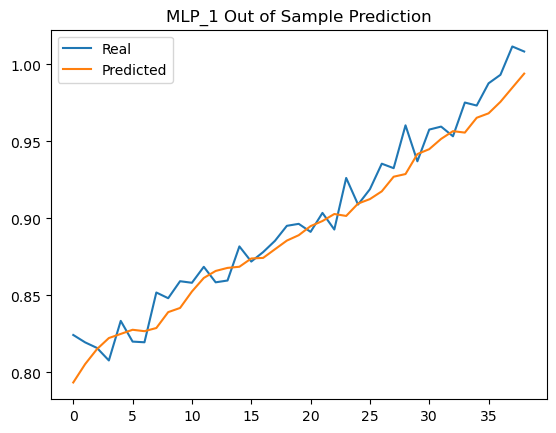

R2 =  0.9341518418846236
MAE =  0.011366317276491568
MSE =  0.00019221458685527562
MAPE =  0.012751274962194812
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


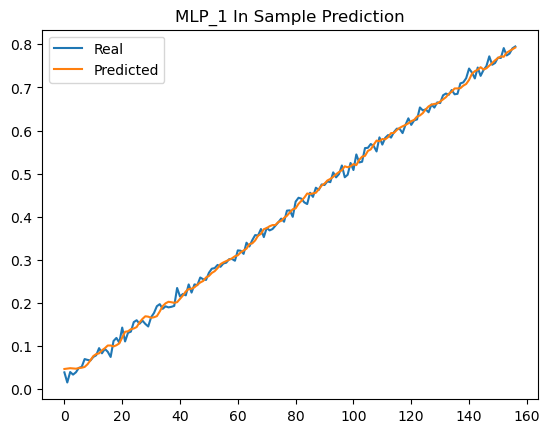

In [147]:
# Task 3.1.1.2
# Creat an array of 200 steps from 0 to 1 with noise
np.random.seed(0)  # for reproducibility
noise = np.random.normal(0, 1, num_points)  # random noise
series_noise = series + 0.01*noise

# Split data as required
train_series, test_series = split_data(series_noise, 4, 1, 0.8)

# Create MLP
MLP_1 = create_MLP(train_series[0], train_series[1], 4, 15, 20)

# Predict out of sample values
MLP_1_Output_Predict = MLP_1.predict(test_series[0])

plt.figure()
plt.title("MLP_1 Out of Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(MLP_1_Output_Predict, label='Predicted')
plt.legend()
plt.savefig('plots/MLP_1_OutSample.png')
plt.show()

print('R2 = ', r2_score(MLP_1_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_1_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_1_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(MLP_1_Output_Predict, test_series[1]))

# Predict in sample values
MLP_1_Output_Predict = MLP_1.predict(train_series[0])

plt.figure()
plt.title("MLP_1 In Sample Prediction")
plt.plot(train_series[1],label='Real')
plt.plot(MLP_1_Output_Predict, label='Predicted')
plt.legend()
plt.savefig('plots/MLP_1_InSample.png')
plt.show()

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1009
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


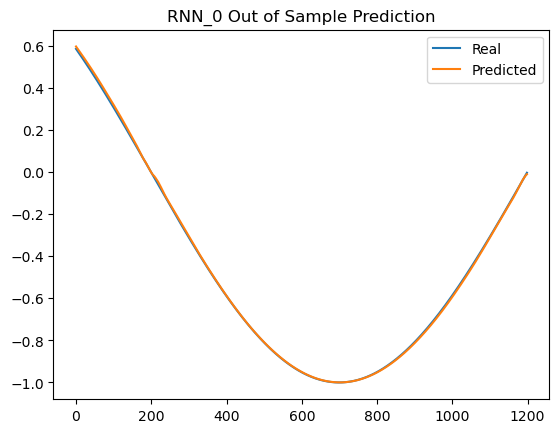

R2 =  0.999767305448598
MAE =  0.005591565196936493
MSE =  4.871769246337833e-05
MAPE =  0.06379933877287347
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


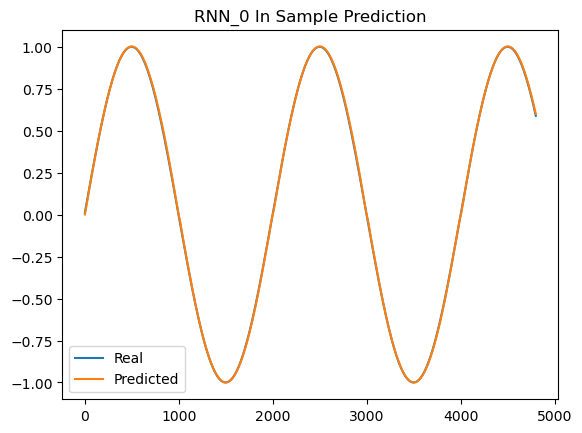

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2632
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


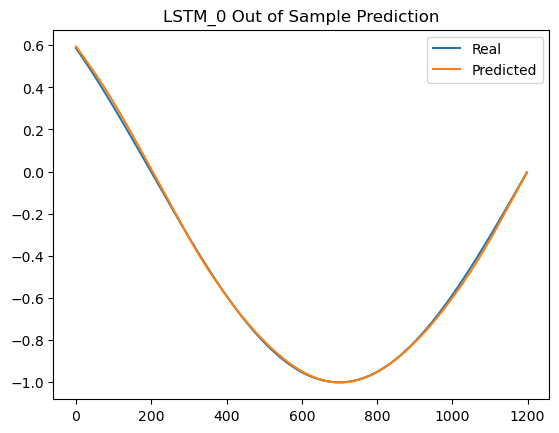

R2 =  0.9992650389792876
MAE =  0.009278321643261886
MSE =  0.00015458382525965935
MAPE =  0.12497264596343385
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


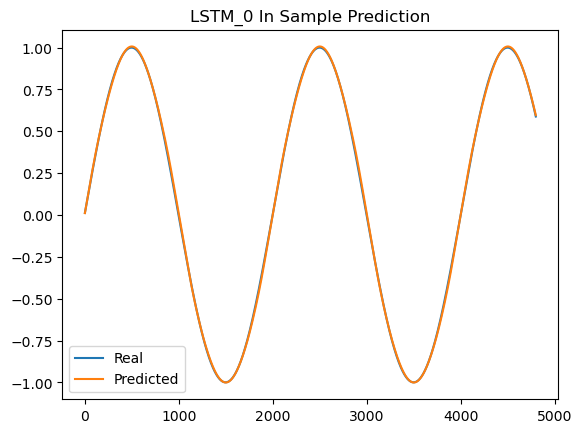

In [160]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM


def generate_sine_wave(freq, amplitude, duration, sampling_rate, noise_level):
    """
    Generate a sine wave.

    Parameters:
        freq (float): Frequency of the sine wave in Hz.
        amplitude (float): Amplitude of the sine wave.
        duration (float): Duration of the sine wave in seconds.
        sampling_rate (int): Sampling rate (number of samples per second).

    Returns:
        numpy.ndarray: The generated sine wave.
    """
    num_samples = int(duration * sampling_rate)
    time = np.linspace(0, duration, num_samples)
    noise = np.random.uniform(-noise_level, noise_level, num_samples)
    sine_wave = amplitude * np.sin(2 * np.pi * freq * time) + noise
    return [sine_wave,time]


#define an RNN model to be trained
def create_RNN(input_train, output_train, window_size_in, window_size_out, epochs = 1):

    num_neurons = 64

    # Create RNN model
    model = Sequential()
    model.add(SimpleRNN(num_neurons, activation="relu",input_shape=(window_size_in,1)))    # Input layer
    #model.add(Dense(32))
    #model.add(Dense(16))
    model.add(Dense(window_size_out))  # Output layer, no activation for regression

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(input_train, output_train, epochs=epochs, batch_size=32)

#    model.summary()
    return model


#define an LSTM model to be trained
def create_LSTM(input_train, output_train, window_size_in, window_size_out, epochs = 1):

    num_neurons = 64

    # Create LSTM model
    model = Sequential()
    model.add(LSTM(num_neurons,activation="relu",input_shape=(window_size_in,1)))    # Input layer
    #model.add(Dense(32))
    #model.add(Dense(16))
    model.add(Dense(window_size_out))  # Output layer, no activation for regression

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(input_train, output_train, epochs=epochs, batch_size=32)

#    model.summary()
    return model

# Task 3.1.1.2
# Sine wave Parameters
frequency = 1/20  # Hz
amplitude = 1.0
duration = 60.0  # seconds
sampling_rate = 100  # Hz

# Generate sine wave
[sine_wave, time] = generate_sine_wave(frequency, amplitude, duration, sampling_rate, 0)

# Split data as required
train_series, test_series = split_data(sine_wave, 4, 2, 0.8)

# Re-shape input data for RNN and LSTM
train_series[0] = train_series[0].reshape(-1, 4, 1)
test_series[0] = test_series[0].reshape(-1, 4, 1)

# Create RNN
RNN_0 = create_RNN(train_series[0], train_series[1], 4, 2)

# Predict out of sample values
RNN_0_Output_Predict = RNN_0.predict(test_series[0])

plt.figure()
plt.title("RNN_0 Out of Sample Prediction")
plt.plot(test_series[1][:,0],label='Real')
plt.plot(RNN_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.savefig('plots/RNN_0_OutSample.png')
plt.show()

print('R2 = ', r2_score(RNN_0_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_0_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_0_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(RNN_0_Output_Predict, test_series[1]))


# Predict in sample values
RNN_0_Output_Predict = RNN_0.predict(train_series[0])

plt.figure()
plt.title("RNN_0 In Sample Prediction")
plt.plot(train_series[1][:,0],label='Real')
plt.plot(RNN_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.savefig('plots/RNN_0_InSample.png')
plt.show()

# Create LSTM
LSTM_0 = create_LSTM(train_series[0], train_series[1], 4, 2, )

# Predict out of sample values
LSTM_0_Output_Predict = LSTM_0.predict(test_series[0])

plt.figure()
plt.title("LSTM_0 Out of Sample Prediction")
plt.plot(test_series[1][:,0], label='Real')
plt.plot(LSTM_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.savefig('plots/LSTM_0_OutSample.png')
plt.show()

print('R2 = ', r2_score(LSTM_0_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_0_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_0_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(LSTM_0_Output_Predict, test_series[1]))


# Predict in sample values
LSTM_0_Output_Predict = LSTM_0.predict(train_series[0])

plt.figure()
plt.title("LSTM_0 In Sample Prediction")
plt.plot(train_series[1][:,0], label='Real')
plt.plot(LSTM_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.savefig('plots/LSTM_0_InSample.png')
plt.show()


Epoch 1/10


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2460
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1038
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1016
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1000
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1008
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1012
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1023
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1004
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1010
Epoch 10/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0984
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


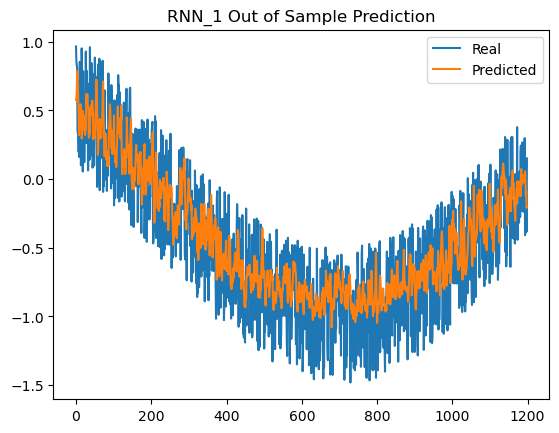

R2 =  0.33488839742188986
MAE =  0.27573067854832417
MSE =  0.10719078470557344
MAPE =  1.962428339106479
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


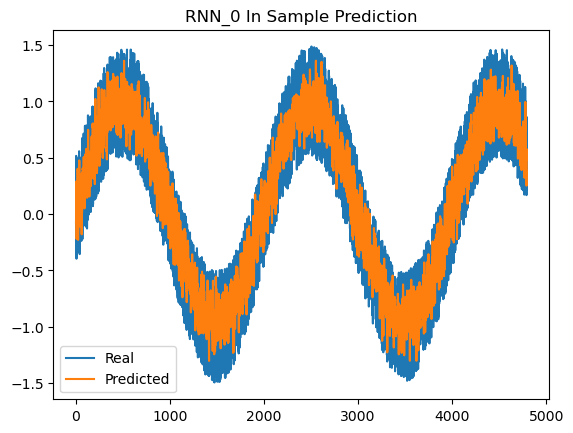

Epoch 1/10


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3467
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1045
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1022
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1034
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1015
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1038
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1009
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1010
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1011
Epoch 10/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0991
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


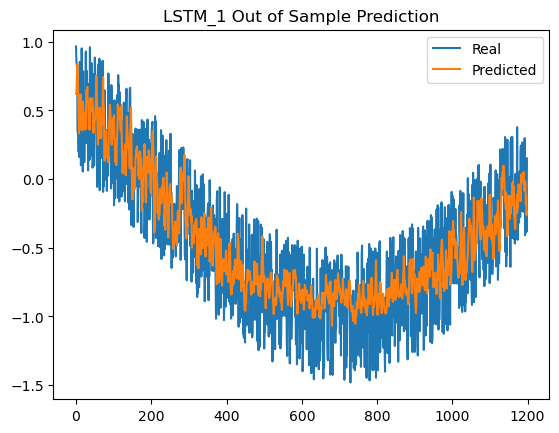

R2 =  0.5032241873252901
MAE =  0.26620430112137417
MSE =  0.09926628025961752
MAPE =  1.1317786708757798
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


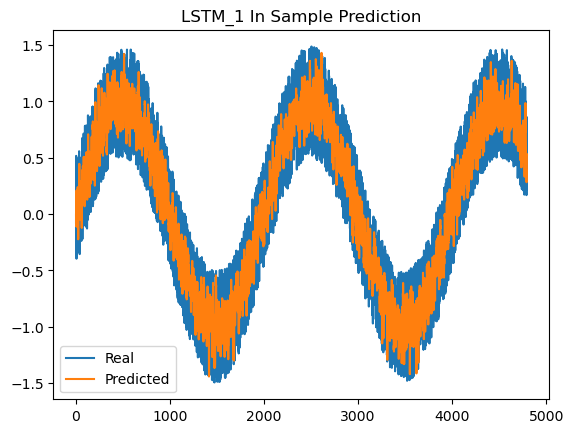

In [159]:

noise_level = 0.5   # noise

# Generate noisy sine wave
[sine_wave_noise, time] = generate_sine_wave(frequency, amplitude, duration, sampling_rate, noise_level)

# Split data as required
train_series, test_series = split_data(sine_wave_noise, 4, 2, 0.8)

# Re-shape input data for RNN and LSTM
train_series[0] = train_series[0].reshape(-1, 4, 1)
test_series[0] = test_series[0].reshape(-1, 4, 1)

# Create RNN
RNN_1 = create_RNN(train_series[0], train_series[1], 4, 2, 10)

# Predict output values
RNN_1_Output_Predict = RNN_1.predict(test_series[0])

plt.figure()
plt.title("RNN_1 Out of Sample Prediction")
plt.plot(test_series[1][:,0],label='Real')
plt.plot(RNN_1_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.savefig('plots/RNN_1_OutSample.png')
plt.show()

print('R2 = ', r2_score(RNN_1_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_1_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_1_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(RNN_1_Output_Predict, test_series[1]))

# Predict in sample values
RNN_0_Output_Predict = RNN_0.predict(train_series[0])

plt.figure()
plt.title("RNN_1 In Sample Prediction")
plt.plot(train_series[1][:,0],label='Real')
plt.plot(RNN_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.savefig('plots/RNN_1_InSample.png')
plt.show()

# Create LSTM
LSTM_1 = create_LSTM(train_series[0], train_series[1], 4, 2, 10)

# Predict out of sample values
LSTM_1_Output_Predict = LSTM_1.predict(test_series[0])

plt.figure()
plt.title("LSTM_1 Out of Sample Prediction")
plt.plot(test_series[1][:,0],label='Real')
plt.plot(LSTM_1_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.savefig('plots/LSTM_1_OutSample.png')
plt.show()

print('R2 = ', r2_score(LSTM_1_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_1_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_1_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(LSTM_1_Output_Predict, test_series[1]))


# Predict In sample values
LSTM_0_Output_Predict = LSTM_0.predict(train_series[0])

plt.figure()
plt.title("LSTM_1 In Sample Prediction")
plt.plot(train_series[1][:,0], label='Real')
plt.plot(LSTM_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.savefig('plots/LSTM_1_InSample.png')
plt.show()

In [150]:
from statsmodels.tsa.arima_process import ArmaProcess

# Task 3.1.2

# Pure white noise signal
length = 1000  # Length of the white noise series

# Generate white noise
white_noise = np.random.normal(0, 1, length)  # mean = 0, standard deviation = 1

# Random Walker seies
# Compute the random walk
random_walk = np.cumsum(white_noise)

#ARMA(2,2) model
# Define the parameters for the ARMA(2, 2) process
ar_params = np.array([1, -0.75, 0.25])  # AR coefficients (include 1 for the zero lag)
ma_params = np.array([1, 0.65, 0.35])   # MA coefficients (include 1 for the zero lag)

# Generate the ARMA(2, 2) process
arma_process = ArmaProcess(ar_params, ma_params)

# Generate the series
arma_series = arma_process.generate_sample(nsample=length)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1.0186
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9634
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9558
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0146
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9070
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9805
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9247
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9574
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9221
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9746
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9850
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9371
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8459
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8377
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9098
Epoc

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9962
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9671
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9778
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9872 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9414
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8580
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9732
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8699
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9203
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9024
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8851
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8956
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9153 
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9397
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8951
Epoch 16/100
2

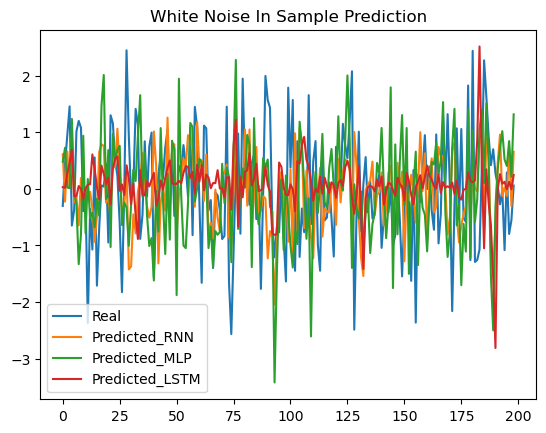

In [163]:
# Check different models for white noise

input_window = 5
epochs = 100
# Split data as required
train_series, test_series = split_data(white_noise, input_window, 1, 0.8)

# Create MLP
MLP_2 = create_MLP(train_series[0], train_series[1], input_window, 15, epochs)

# Predict out of sample values
MLP_2_Output_Predict = MLP_2.predict(test_series[0])

# Create RNN
RNN_2 = create_RNN(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
RNN_2_Output_Predict = RNN_2.predict(test_series[0])

# Create LSTM
LSTM_2 = create_LSTM(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
LSTM_2_Output_Predict = LSTM_2.predict(test_series[0])

print("MLP")
print('R2 = ', r2_score(MLP_2_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_2_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_2_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(MLP_2_Output_Predict, test_series[1]))

print("RNN")
print('R2 = ', r2_score(RNN_2_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_2_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_2_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(RNN_2_Output_Predict, test_series[1]))

print("LSTM")
print('R2 = ', r2_score(LSTM_2_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_2_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_2_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(LSTM_2_Output_Predict, test_series[1]))


plt.figure()
plt.title("White Noise In Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(RNN_2_Output_Predict, label='Predicted_RNN')
plt.plot(MLP_2_Output_Predict, label='Predicted_MLP')
plt.plot(LSTM_2_Output_Predict, label='Predicted_LSTM')
plt.legend()
plt.savefig('plots/WhiteNoise_InSample.png')
plt.show()


Epoch 1/100


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 188.6735
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.8081
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7419
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5569
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6178
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5112
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5495
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5386
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7638
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1367
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1363
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2739
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3339
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3290
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3694
Epoch 16/100


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 228.0921
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3262
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3145
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8378
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6249
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6265
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4925
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5511
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4600
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4212
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5485
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4948
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4665
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4035
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3703
Epoch 16/100
2

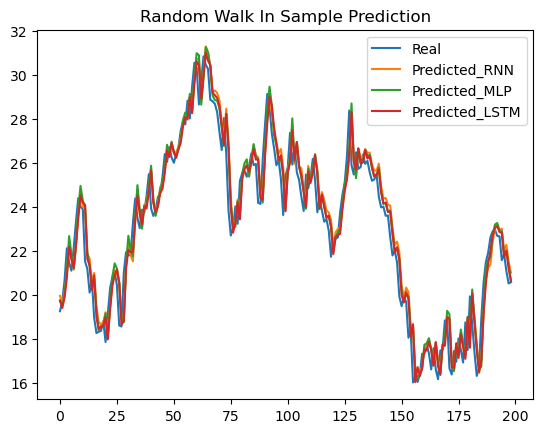

In [152]:
# Check different models for random_walk

input_window = 5
epochs = 100
# Split data as required
train_series, test_series = split_data(random_walk, input_window, 1, 0.8)

# Create MLP
MLP_3 = create_MLP(train_series[0], train_series[1], input_window, 15, epochs)

# Predict out of sample values
MLP_3_Output_Predict = MLP_3.predict(test_series[0])

# Create RNN
RNN_3 = create_RNN(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
RNN_3_Output_Predict = RNN_3.predict(test_series[0])

# Create LSTM
LSTM_3 = create_LSTM(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
LSTM_3_Output_Predict = LSTM_3.predict(test_series[0])

print("MLP")
print('R2 = ', r2_score(MLP_3_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_3_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_3_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(MLP_3_Output_Predict, test_series[1]))

print("RNN")
print('R2 = ', r2_score(RNN_3_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_3_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_3_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(RNN_3_Output_Predict, test_series[1]))

print("LSTM")
print('R2 = ', r2_score(LSTM_3_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_3_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_3_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(LSTM_3_Output_Predict, test_series[1]))

plt.figure()
plt.title("Random Walk In Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(RNN_3_Output_Predict, label='Predicted_RNN')
plt.plot(MLP_3_Output_Predict, label='Predicted_MLP')
plt.plot(LSTM_3_Output_Predict, label='Predicted_LSTM')
plt.legend()
plt.savefig('plots/RandomWalk_InSample.png')
plt.show()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 4.3335
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7266
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4913
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2165
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1095
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0635
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0790
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1598
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9810
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9774
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0113
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9292
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9410
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0133
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9934
Epoc

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.9322
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0533
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3166
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2398
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0651
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9991
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0469
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0476
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0655
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9673
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0096
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9907
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9817
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0705
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9368
Epoch 16/100
25/

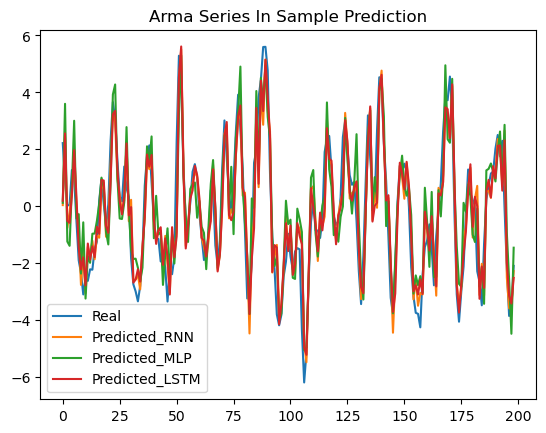

In [153]:
# Check different models for arma(2,2)

input_window = 5
epochs = 100
# Split data as required
train_series, test_series = split_data(arma_series, input_window, 1, 0.8)

# Create MLP
MLP_4 = create_MLP(train_series[0], train_series[1], input_window, 15, epochs)

# Predict out of sample values
MLP_4_Output_Predict = MLP_4.predict(test_series[0])

# Create RNN
RNN_4 = create_RNN(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
RNN_4_Output_Predict = RNN_4.predict(test_series[0])

# Create LSTM
LSTM_4 = create_LSTM(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
LSTM_4_Output_Predict = LSTM_4.predict(test_series[0])

print("MLP")
print('R2 = ', r2_score(MLP_4_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_4_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_4_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(MLP_4_Output_Predict, test_series[1]))


print("RNN")
print('R2 = ', r2_score(RNN_4_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_4_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_4_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(RNN_4_Output_Predict, test_series[1]))


print("LSTM")
print('R2 = ', r2_score(LSTM_4_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_4_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_4_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(LSTM_4_Output_Predict, test_series[1]))


plt.figure()
plt.title("Arma Series In Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(RNN_4_Output_Predict, label='Predicted_RNN')
plt.plot(MLP_4_Output_Predict, label='Predicted_MLP')
plt.plot(LSTM_4_Output_Predict, label='Predicted_LSTM')
plt.legend()
plt.savefig('plots/ArmaSeries_InSample.png')
plt.show()


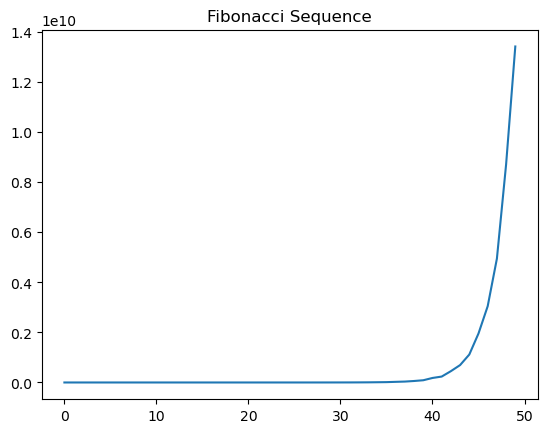

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 286975789629440.0000
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 565043347324928.0000 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 286236853927936.0000 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 286772718206976.0000 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 406830106804224.0000 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 283502536818688.0000 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 282006579576832.0000 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 290172184821760.0000
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 254465923874816.0000 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 228308348305408.0000
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 209046342729728.0000
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 170891967201280.0000
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step -

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 275952537960448.0000
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 216657360322560.0000 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 230658752380928.0000
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 221336056102912.0000 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 189361702305792.0000 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 215601100357632.0000 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 168766075830272.0000 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 159061697888256.0000 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 164270604025856.0000 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 145264098672640.0000 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 158698102063104.0000 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 144695351050240.0000 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 175

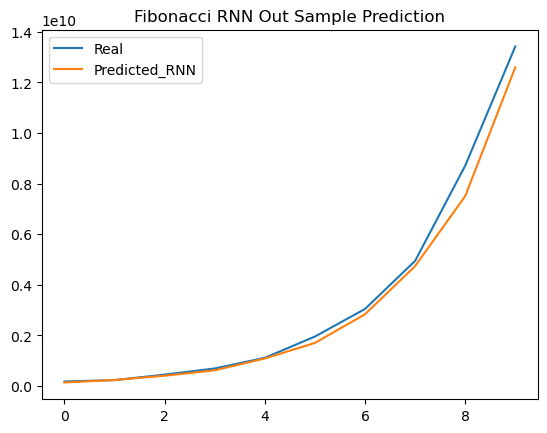

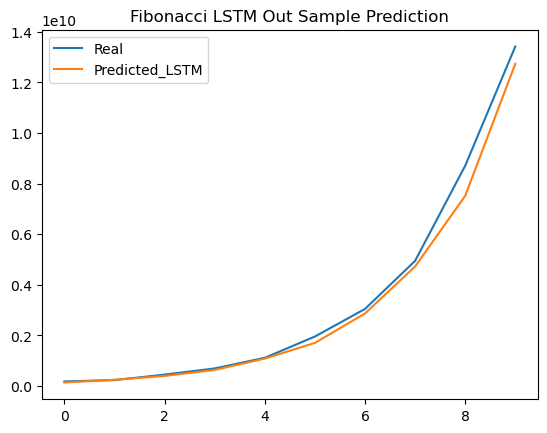

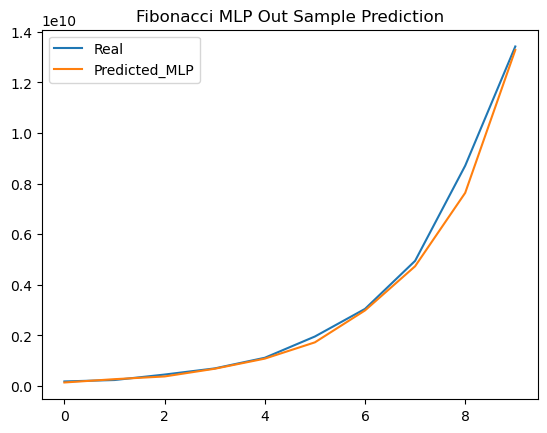

MLP
R2 =  0.9921006442651499
MAE =  191506610.0
MSE =  1.2847359e+17
MAPE =  0.102065325
RNN
R2 =  0.984621497105536
MAE =  288071170.0
MSE =  2.2858824e+17
MAPE =  0.102554664
LSTM
R2 =  0.9865081782467019
MAE =  272249340.0
MSE =  2.0413275e+17
MAPE =  0.10500219


In [154]:
#import tensorflow as tf

#3.1.3

# Generate sequence
num_points = 50
fib_sequence = [1, 1]   # Start with 1 to avoid negative values due to noise
while len(fib_sequence) < num_points:
    fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])

fib_sequence = np.array(fib_sequence, dtype=np.float32)

# Add noise
noise_ratio = 0.05
fib_sequence_noise = np.array(fib_sequence, dtype=np.float32)
for i in range(len(fib_sequence)):
   fib_sequence_noise[i] = fib_sequence[i] +  np.random.normal(0, fib_sequence[i]*noise_ratio)

# Calculate noise amplitude
#noise_ratio = 0.05
#noise_amplitude = fib_sequence.std() * noise_ratio

#noise = np.random.normal(0, noise_amplitude, len(fib_sequence))
#offset = min(noise)
#fib_sequence_noise = fib_sequence + noise - offset

# Plot data for visual inspection
plt.figure()
plt.title("Fibonacci Sequence")
plt.plot(fib_sequence_noise)
plt.savefig('plots/FibSeq.png')
plt.show()

input_window = 2
epochs = 100
# Split data as required
train_series, test_series = split_data(fib_sequence_noise, input_window, 1, 0.8)

# Remove possible Nans
#train_series[0] = np.nan_to_num(train_series[0])
#train_series[1] = np.nan_to_num(train_series[1])
#test_series[0] = np.nan_to_num(test_series[0])
#test_series[1] = np.nan_to_num(test_series[1])

# Ensure series is compatible with tensor flow
#train_series[0] = tf.convert_to_tensor(train_series[0], dtype=tf.float32)
#train_series[1] = tf.convert_to_tensor(train_series[1], dtype=tf.float32)

#test_series[0] = tf.convert_to_tensor(test_series[0], dtype=tf.float32)
#test_series[1] = tf.convert_to_tensor(test_series[1], dtype=tf.float32)

# Create MLP
MLP_5 = create_MLP(train_series[0], train_series[1], input_window, 15, epochs)

# Predict out of sample values
MLP_5_Output_Predict = MLP_5.predict(test_series[0], verbose=0)
#MLP_5_Output_Predict = np.nan_to_num(MLP_5_Output_Predict)

# Create RNN
RNN_5 = create_RNN(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
RNN_5_Output_Predict = RNN_5.predict(test_series[0], verbose=0)
#RNN_5_Output_Predict = np.nan_to_num(RNN_5_Output_Predict)

# Create LSTM
LSTM_5 = create_LSTM(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
LSTM_5_Output_Predict = LSTM_5.predict(test_series[0], verbose=0)
#LSTM_5_Output_Predict = np.nan_to_num(LSTM_5_Output_Predict)

plt.figure()
plt.title("Fibonacci RNN Out Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(RNN_5_Output_Predict, label='Predicted_RNN')
plt.legend()
plt.savefig('plots/Fib_RNN_OutSample.png')
plt.show()

plt.figure()
plt.title("Fibonacci LSTM Out Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(LSTM_5_Output_Predict, label='Predicted_LSTM')
plt.legend()
plt.savefig('plots/Fib_LSTM_OutSample.png')
plt.show()

plt.figure()
plt.title("Fibonacci MLP Out Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(MLP_5_Output_Predict, label='Predicted_MLP')
plt.legend()
plt.savefig('plots/Fib_MLP_OutSample.png')
plt.show()

print("MLP")
print('R2 = ', r2_score(MLP_5_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_5_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_5_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(MLP_5_Output_Predict, test_series[1]))

print("RNN")
print('R2 = ', r2_score(RNN_5_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_5_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_5_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(RNN_5_Output_Predict, test_series[1]))

print("LSTM")
print('R2 = ', r2_score(LSTM_5_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_5_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_5_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(LSTM_5_Output_Predict, test_series[1]))


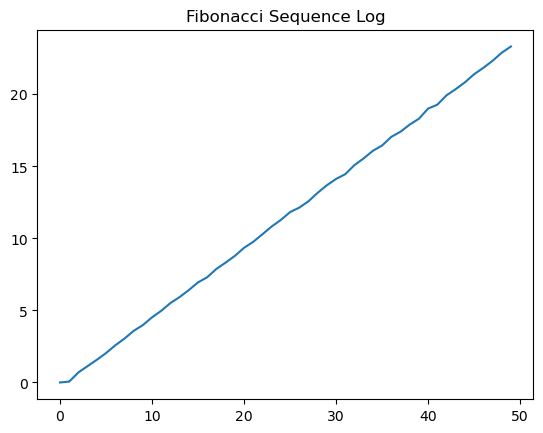

Original p_value =  0.994305307383921


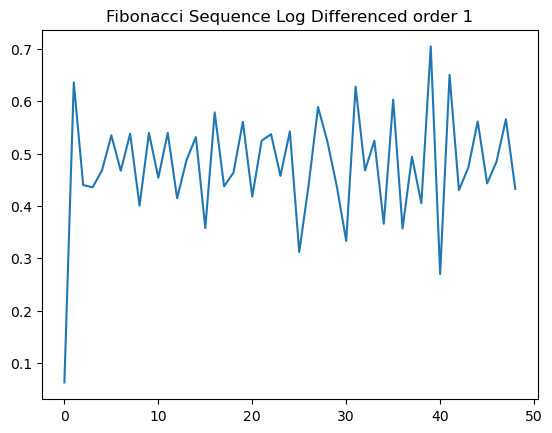

Diff 1 p_value =  3.868561274820006e-09


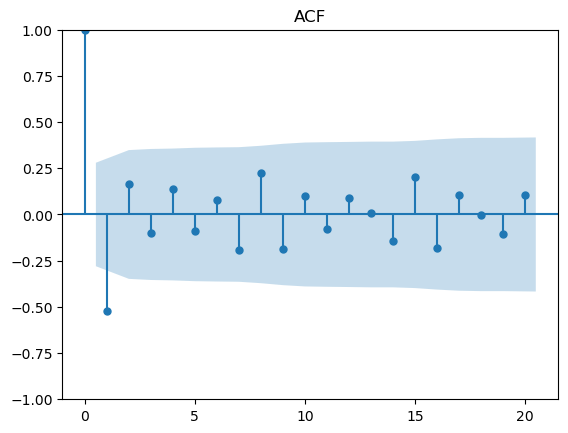

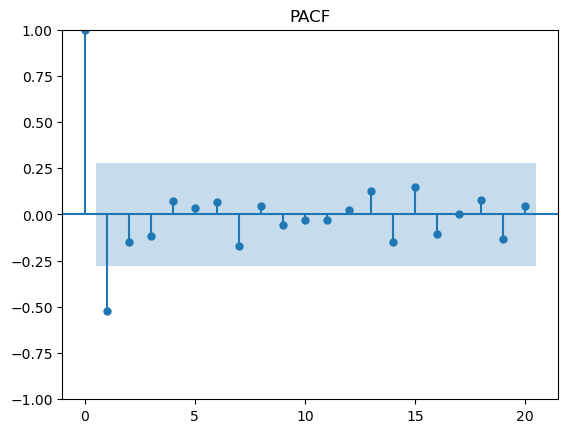

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


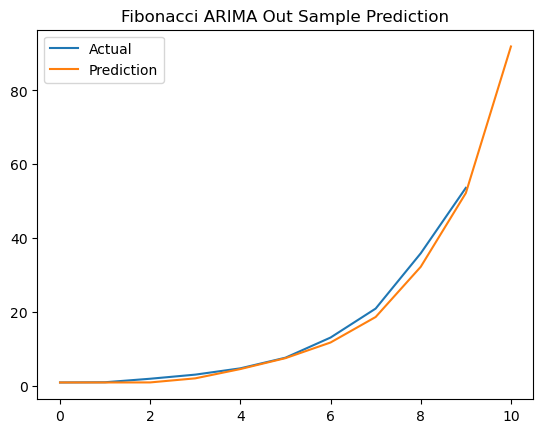

ARIMA


ValueError: Found input variables with inconsistent numbers of samples: [11, 10]

In [164]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima

# To determine ARIMA (p,d,q) properties:

# Data is non-stationary. Modify input data for better visualisation
fib_sequence_noise_log = np.log(fib_sequence_noise)

# Plot data for visual inspection
plt.figure()
plt.title("Fibonacci Sequence Log")
plt.plot(fib_sequence_noise_log)
plt.savefig('plots/FibSeq_Log.png')
plt.show()

# ADF test to check if data is stationary
# p should be < 0.05 is stationary
result_adf = adfuller(fib_sequence_noise_log, autolag='AIC')
p_value = result_adf[1]
print("Original p_value = ", p_value)

# From log transformation of data, Linear trend detected. order-1 differencing applied to remove trend
fib_sequence_noise_log_diff = np.diff(fib_sequence_noise_log,1)

# Plot data for visual inspection
plt.figure()
plt.title("Fibonacci Sequence Log Differenced order 1")
plt.plot(fib_sequence_noise_log_diff)
plt.savefig('plots/FibSeq_Log_Diff1.png')
plt.show()

# ADF test to check if data is stationary
# p should be < 0.05 is stationary
result_adf = adfuller(fib_sequence_noise_log_diff, autolag='AIC')
p_value = result_adf[1]
print("Diff 1 p_value = ", p_value)
'''
# Difference by order 2 now
fib_sequence_noise_log_diff2 = np.diff(fib_sequence_noise_log,2)

# Plot data for visual inspection
plt.figure()
plt.savefig('plots/FibSeq_Log_Diff2.png')
plt.title("Fibonacci Sequence Log Differenced order 2")
plt.plot(fib_sequence_noise_log_diff2)

# ADF test to check if data is stationary
# p should be < 0.5 is stationary
result_adf = adfuller(fib_sequence_noise_log_diff2)
p_value = result_adf[1]
print("Diff 2 p_value = ", p_value)

# Difference by order 3 now
fib_sequence_noise_log_diff3 = np.diff(fib_sequence_noise_log,3)

# Plot data for visual inspection
plt.figure()
plt.savefig('plots/FibSeq_Log_Diff3.png')
plt.title("Fibonacci Sequence Log Differenced order 3")
plt.plot(fib_sequence_noise_log_diff3)

# ADF test to check if data is stationary
# p should be < 0.5 is stationary
result_adf = adfuller(fib_sequence_noise_log_diff2)
p_value = result_adf[1]
print(p_value)
'''
# Data is stationary

# Plot ACF and PACF graphs to determine p,q values
plot_acf(fib_sequence_noise_log_diff, lags=20)
plt.title('ACF')
plt.savefig('plots/FibSeq_ACF.png')
plt.show()

plot_pacf(fib_sequence_noise_log_diff, lags=20)
plt.title('PACF')
plt.savefig('plots/FibSeq_PACF.png')
plt.show()

# p,d,q = 2,1,2

# Create ARIMA model
#arima_test_actual = fib_sequence_noise_log_diff[0:20]
arima_test_actual = fib_sequence_noise_log[0:10]
arima_model_unfit = ARIMA(fib_sequence_noise_log, order=(2,1,2))
arima_model = arima_model_unfit.fit()
arima_test_predict = arima_model.predict(start=0, end=len(arima_test_actual) - 1)

plt.figure()
plt.title("Fibonacci ARIMA Out Sample Prediction")
plt.plot(np.exp(arima_test_actual), label = "Actual")
plt.plot(np.exp(arima_test_predict), label = "Prediction")
plt.legend()
plt.savefig('plots/ARIMA_FibSeq.png')
plt.show()

print("ARIMA")
print('R2 = ', r2_score(arima_test_predict, arima_test_actual))
print('MAE = ', mean_absolute_error(arima_test_predict, arima_test_actual))
print('MSE = ', mean_squared_error(arima_test_predict, arima_test_actual))
print('MAPE = ', mean_absolute_percentage_error(arima_test_predict, arima_test_actual))

# Check AIC of model selected
# Should be as low as possible
print(arima_model.summary())

# Confirm with auto-arima
#arima_model = auto_arima(fib_sequence_noise_log_diff, d=1, seasonal=False, information_criterion='aic')
#print(arima_model.summary())
# Check if residual data is white noise
# Get difference of predicted vs actual data
residual_series = arima_model.resid

# perform adf test to check if data is stationary
result_adf = adfuller(residual_series, autolag='AIC')
print('\np-value: ',result_adf[1])
print("ADF Test: p value is < 0.05. Thus the data is stationary\n")

# perform Ljung-Box test on residuals with lag=1 to check if random
result_lb = sm.stats.acorr_ljungbox(residual_series, lags=[1], return_df=True)
print('p-value: ',result_lb)
print("Ljung-Box test: p value is > 0.05. Thus the data is random\n")

# Show data characteristics
print('Mean: ', residual_series.mean())
print('Variance: ', residual_series.var())
print('Standard deviation: ', residual_series.std())

